# A Baby Robot's Guide To Reinforcement Learning

## Part 1: The Bandit Framework

![Photo by Ferenc Almasi on Unsplash](https://cdn-images-1.medium.com/max/800/0*WUKevSQJrdR5Xjwr)

Photo by __[Ferenc Almasi](https://medium.com/r/?url=https%3A%2F%2Funsplash.com%2F%40flowforfrank%3Futm_source%3Dmedium%26utm_medium%3Dreferral)__ on __[Unsplash](https://medium.com/r/?url=https%3A%2F%2Funsplash.com%3Futm_source%3Dmedium%26utm_medium%3Dreferral)__

### Overview:

* Baby Robot is lost. Using Reinforcement Learning we need to help him to find his way back to his mum. 

* Here we cover the "Bandit Framework", the first step on the road to Reinforcement Learning.


## Introduction

Once upon a time there was a Baby Robot. One day he was out shopping with his mum when a robot dog ran past. Baby Robot's mum was busy buying some new spark plugs, so didn't notice when he turned around and started to follow the dog.

He chased the dog through the crowded shopping mall, along several aisles, down escalators and up escalators until, finally, the dog ducked into a service hatch in the wall and was gone. Not only was the service hatch too small for Baby Robot to fit through, but he also realised that he was lost. Well and truly lost.

## The Power Socket Problem

To make matters worse Baby Robot realised that he was nearly out of power. If he was ever going to find his mum again he'd need to recharge. And quickly.

Luckily, there was a charging station directly opposite the point where he'd lost sight of the dog. He made his way over and found that the room contained 5 separate power outlets.

![](Images/power_socket.png)

He moved to the first power point and plugged in. Disappointingly, he only received a burst of power that would keep him running for 2 seconds. He plugged into the same power point again and this time received 3 seconds worth of charge. Better, but still not great. At this rate it would take him forever to fully recharge. Maybe one of the other power points would be better?

<img src="Images/baby_robot_2.png">

With this in mind, he moved to the next power point. Another 3 seconds of charge. This outlet didn't seem any better than the first, so he moved to try the third socket. This time he received 4 seconds worth. This appeared to be the power outlet that would give him the most charge and, while it would still take a long time to fully recharge, it seemed better than the other sockets he'd tried. So, resolving to stay at this power point, he plugged in again. This time he received a measly 2 seconds worth of charge.

Rather than just moving along the sockets, he was going to have to find a better way to discover which was the best and would let him get to maximum charge the fastest.

---

## The Multi-Armed Bandit Problem


*This power outlet problem is analogous to the standard, multi-armed, bandit problem used to illustrate how exploration can be examined in isolation.*

*In the multi-armed bandit you are trying to win as much money as possible from playing a set of one-armed bandits (otherwise known as slot machines or fruit machines), each of which can give a different payout. You need to find which machine gives the biggest payout, so you can make as much money as possible in the allocated time.*

*Each play of a machine (or pull of the bandit's arm) corresponds to one time slot and you only get to play for a fixed number of time slots.*


---

## The Exploration-Exploitation Dilemma

Baby Robot is faced with the problem of not knowing which power outlet will give him the most charge. He therefore needs to explore the possible choices in search of the best one.

However, because he's short on time, he can't take too long to make up his mind as to which is the best, nor can he test each power socket to know exactly how much charge it will give on average. He needs to exploit the knowledge he gains, so that he doesn't waste time trying bad power outlets, to allow him to get the maximum amount of power in the shortest possible time.

This is an example of the classic exploration-exploitation dilemma, in which you want to explore the possible options in search of the best one while, at the same time, wanting to exploit the information that has already been obtained, so that you can gain the maximum possible overall reward.

---

---

## Mathematical Framework and Terminology


To help Baby Robot charge up, and get him back looking for his mum, we'll first need to familiarise ourselves with some of the common terms and mathematical notation used in Reinforcement Learning. 

The notation used largely follows that of Sutton & Barto, from their Bible of Reinforcement Learning, __["Reinforcement Learning: An Introduction"](https://medium.com/r/?url=https%3A%2F%2Famzn.to%2F2RIZ9pc)__.

### ***Action***

In Reinforcement Learning making a choice between the available options, and selecting that option, is known as taking an action. For example, in the power point problem, an action would be selecting one of the available power sockets. In the multi-armed bandit problem it would be choosing and playing one of the set of slot machines.

In the simple power socket and bandit problems actions are taken at discrete time steps. In other words, one action is taken after another and, in these problems, there are a fixed number of total actions. 

* the action taken at time-step 't' is denoted as 'Aₜ'

### ***Reward***

Additionally, every time an action is taken a reward is obtained. In the power socket problem the reward is an amount of charge; whereas, in the bandit problem, it is an amount of money, won from the machine. 

The reward obtained for taking a particular action is a random value, drawn from an underlying probability distribution, specific to that action. So each time an action is taken the reward returned can have a different value. If the same action is repeated multiple times, then a more accurate estimate of the true mean of the reward can be calculated.

Obtaining a reward for taking a particular action is probably the main defining feature of Reinforcement Learning. It is this reward that is used to guide learning, trying to find the best actions and thereby maximise the total overall reward. This is in contrast to supervised learning, in which the best actions would be provided as part of the training data.

* the reward obtained at time-step 't', after taking action 'Aₜ', is denoted as 'Rₜ'

### ***Number of Actions***

The number of available actions is denoted by the letter 'k'. So, in the power socket example, 'k' would be the number of power sockets to choose from. Since, in this case, there are 5 different sockets, 'k' would be 5. In the multi-armed bandit problem, it is the total number of slot-machines to choose from (indeed this problem is often referred to as the 'k-armed bandit problem').

*the number of available actions is denoted by the letter 'k'

### ***Expected Reward***

Each of the available 'k' actions has an ***expected*** reward, where the term 'expected' refers to the mean value that would be obtained if that action was repeated multiple times. So, for example, if a fair coin was being tossed, the expected probability of obtaining heads would be 0.5 since, on average, heads should appear for half of all coin tosses when the total number of tosses is large.

* the expected value of a property is denoted by the symbol '𝔼'

### ***Value***

The expected reward of an action is known as the value of that action and is denoted as 'q(a)' where 'a' is the specific action chose at time step 't' (i.e. Aₜ = a).

* So the value of an action 'a' is given by:


<img src="Images/formula_1.png">


This can be read as: *the value of action 'a' is equal to the expected (mean) value of the reward, given that the action chosen at time-step 't' is action 'a'.*

(NB: any time you see the symbol '|' in a probability equation, just read it as 'given that').

Effectively this says that if you keep repeating action 'a' and average the reward values you get back then, ultimately, you'll end up knowing the true value 'q(a)', the mean reward for 'a'. So, if Baby Robot keeps trying the same power socket he'll get an increasingly accurate estimate of that socket's true mean power output until, eventually, if he repeats the action for long enough, he'll know the true value of that socket's output.


---
## Sample Average Estimates

Obviously we don't know the true value of the actions' rewards. If we did then things would be simple. We'd just exploit the knowledge we have without having to do any exploration. We'd just play the best slot machine to win the most money and Baby Robot would plug into the socket that gave the most charge. 

However, this isn't the case. We don't know the true rewards and therefore must do some exploration to find how the rewards compare, from each of the possible actions. Consequently, to keep track of which action is best, as we explore the set of possible actions, we need to make an estimate of each action's value. As time progresses, this estimate should get progressively more accurate and converge upon the true reward value.

Since the true value of an action is the mean reward for that action, a simple, but effective, estimate can be calculated by taking the average value of the rewards returned so far for that action.

So, 'Qₜ(a)', the estimated value of action 'a' at time step 't', is given by:


<img src="Images/formula_2.png">


where 'n' is the number of times that action 'a' was taken, prior to time 't', and 'Rᵢ' is the reward obtained at each of the time steps when action 'a' was taken.

---
## Calculating the Sample Average

The simplest way to form the sum of all rewards, for any action, is to store each of the rewards and then add them when required. However, from a practical point of view this isn't very efficient, both in terms of storage and computing time. It would be possible to keep track of the summed rewards, but even this value would grow to be unmanageable over time.

* A better solution is to calculate the new estimated reward based on the last estimate.

For an action 'a', the nᵗʰ estimate for the action-value, 'Qₙ', is given by the sum of all previous rewards obtained for that action, divided by the number of times that action has been selected (i.e. it's just the average value):


<img src="Images/formula_3.png">


So, swapping things around, the sum of the rewards, prior to 'n', is given by:


<img src="Images/formula_4.png">



When the next reward, 'Rₙ', is obtained, the new estimate can be calculated by adding this to the previous sum of the rewards and increasing the count of the number of times the action has been taken. So the new estimate is:


<img src="Images/formula_5.png">



<img src="Images/formula_6.png">


Since we already know how to write the sum of the rewards, prior to 'n', in terms of the last estimate, we can simply swap this into the equation:




<img src="Images/formula_7.png">


Rearranging this, we end up with a usable form for the new estimate, expressed in terms of the last estimate 'Qₙ' and the new reward 'Rₙ':



<img src="Images/formula_8.png">

<i><center>Formula 1: The new estimate, calculated in terms of the last estimate and the new reward.</center></i>

---
## Testing Selection Strategies

Now we have all the required notation and terminology in place, we can build a test system. This will let us examine how different strategies perform at finding and exploiting the best power socket. Remember that we want to get Baby Robot charged up in the minimum amount of time, so we need to locate the best socket and then use it until charging is complete.

### Implementing the Power Socket

A python implementation of a power socket is shown below:

In [1]:
class PowerSocket:
    """ the base power socket class """
    
    def __init__(self, q):                
        self.q = q        # the true reward value              
        self.initialize() # reset the socket
        
    def initialize(self):
        self.Q = 0   # the estimate of this socket's reward value                
        self.n = 0   # the number of times this socket has been tried        
    
    def charge(self):
        """ return a random amount of charge """
        
        # the reward is a guassian distribution with unit variance around the true
        # value 'q'
        value = np.random.randn() + self.q        
        
        # never allow a charge less than 0 to be returned        
        return 0 if value < 0 else value
                    
    def update(self,R):
        """ update this socket after it has returned reward value 'R' """     
    
        # increment the number of times this socket has been tried
        self.n += 1

        # the new estimate of the mean is calculated from the old estimate
        self.Q = (1 - 1.0/self.n) * self.Q + (1.0/self.n) * R
    
    def sample(self):
        """ return an estimate of the socket's reward value """
        return self.Q

In the '__init__' (constructor) function, we just initialise the variables used by the socket. These are:

q = the true mean value of the socket output 
Q = the running estimate of the socket output (i.e. its reward)
n = the number of times the socket has been tried

When estimating the socket output, the true output 'q' is the value that we're trying to converge upon. Although 'q' is required to setup the socket, it's value isn't used elsewhere, since this is the value we're trying to find.

The 'charge' function returns the output reward for the socket. This is given by a normal (Gaussian) distribution, with a mean value of 'q' (the value provided during setup).

The 'update' function calculates the sample average estimate, using the new reward value and the previous estimate, as described in formula 1 in the previous section. In code this translates directly to be:





## Implementing the Charging Room

We want to setup a room that has 5 sockets, each of which will return a burst of power with a mean duration that is different to the other sockets.

So, in the code below, we create the 5 sockets and randomly assign them a mean value that is given by a random value between 1 and 5, doubled and offset by 2. This creates distinct power outputs and keeps the outputs above zero. Note that the room is created randomly each time this code is run, so that the socket which is best will potentially change each time (and therefore won't match with the outputs that Baby Robot was seeing!).

In [2]:
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython.core.pylabtools import figsize

In [3]:
# create 5 sockets in a fixed order
socket_order = [2,1,3,5,4]

# create the sockets
# - the mean value of each socket is derived from the socket order index, which is doubled to give 
#   distinct values and offset by 2 to keep the distribution above zero
sockets = [PowerSocket((q*2)+2) for q in socket_order]

# save the number of sockets
NUM_SOCKETS = len(socket_order)

In [4]:
# using a very large number of time steps just to create sufficient data to get smooth plots of socket output
TOTAL_STEPS = 100000

# rewards will contain the charge returned at all of the time steps for each socket 
rewards = np.zeros(shape=(TOTAL_STEPS,NUM_SOCKETS))

# iterate through each of the sockets
for socket_number,socket in enumerate(sockets):
    
    # get charge from the socket for the defined number of steps   
    for t in range(TOTAL_STEPS): rewards[t,socket_number] = socket.charge()                

In the above code we test each socket for a whopping 100,000 time steps. This is only to get smooth curves for our graphs, to show exactly how the output distribution varies for each socket. 
Running this, we get the following type of output from each socket:

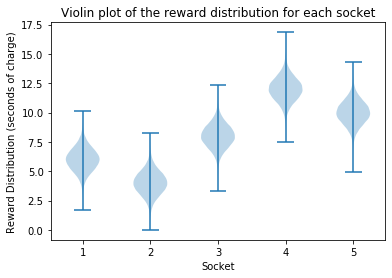

In [5]:
# plot the charge we got from the sockets           
plt.violinplot(rewards)   
plt.xlabel('Socket')
plt.ylabel('Reward Distribution (seconds of charge)') 
plt.title('Violin plot of the reward distribution for each socket')
plt.show() 

In the "violin" plot above, the line for each socket shows the range of values returned as the reward for each socket. So socket number 1 returned between approximately 2 and 10 seconds of charge. The shaded area, underneath the line, represents the frequency at which each reward was returned. For socket 1 the most frequently returned reward was 6 seconds of charge. This is the mean reward for this socket and also its true reward value.

Text(0, 0.5, 'Density')

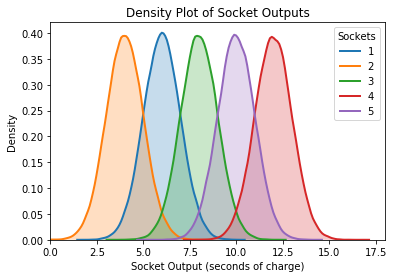

In [6]:
# iterate through the sockets to draw each plot
# (from: https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)
for socket_number in range(NUM_SOCKETS):
    sns.distplot(pd.DataFrame(rewards[:,socket_number]), hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2},
                 label = f'{socket_number+1}');
    
# Plot formatting
plt.xlim(0, None)
plt.legend(title = 'Sockets')
plt.title('Density Plot of Socket Outputs')
plt.xlabel('Socket Output (seconds of charge)')
plt.ylabel('Density')

In the density plot we can see how the reward probability varies for each socket. In this run of the code, socket number 4 is the best, giving an average of 12 seconds worth of charge, whereas socket 2 is the worst, giving only 4 seconds worth. 

To keep the examples consistent, we'll continue to use these reward probabilities for the remainder of the examples, so socket 4 is the optimal socket that we're trying to find and exploit.

---
